In [ ]:
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [ ]:
def dust_data_search(yyyy):
  date = yyyy
  dust_url = ''
  year = []
  mon = []
  dust_dataDate = []
  dust_itemCode = []
  dust_districtName = []
  dust_issueVal = []
  dust_issueGbn = []

  if date == '2019':
    dust_url = 'http://openapi.airkorea.or.kr/openapi/services/rest/UlfptcaAlarmInqireSvc/getUlfptcaAlarmInfo?year='+date+'&pageNo=1&numOfRows=736&ServiceKey='
  else:
    dust_url = 'http://openapi.airkorea.or.kr/openapi/services/rest/UlfptcaAlarmInqireSvc/getUlfptcaAlarmInfo?year='+date+'&pageNo=1&numOfRows=276&ServiceKey='

  dust_key = '1P0EFkE9zCTMG4PND3EGAQN%2FKVg%2BrbQguzgsLoWh%2BIzapXwOqSfvJKivIl7oAK6gwia26UZhtGZ%2Fg4r1gJnWgQ%3D%3D'

  dust_request_api = dust_url + dust_key
  dust_res = requests.get(dust_request_api)

  dust_soup = BeautifulSoup(dust_res.content,'xml')
  dust_item = dust_soup.find_all('item')[::-1]

  for i in dust_item:
    if int(i.dataDate.get_text().replace('-','')[0:6]) < int(date + '07'):
        year.append(date)
        mon.append(i.dataDate.get_text().replace('-','')[4:6])
        dust_itemCode.append('초미세먼지' if i.itemCode.get_text() == 'PM25' else '미세먼지' )
        dust_districtName.append(i.districtName.get_text())
        dust_issueVal.append(i.issueVal.get_text())
        dust_issueGbn.append(i.issueGbn.get_text())

  sum_data = {
      '년': year,
      '월': mon,
      '지역명': dust_districtName,
      '항목': dust_itemCode,
      '경보단계': dust_issueGbn,
      '농도(㎍/㎥)': dust_issueVal
  }
  
  return sum_data

In [ ]:
def dust_data_price(yyyy_list):
  if os.path.exists('fine_dust_data.csv'):
    os.remove('fine_dust_data.csv')

  for i in yyyy_list:
    dust_data = dust_data_search(i)

    df = pd.DataFrame(dust_data)

    if not os.path.exists('fine_dust_data.csv'):
      df.to_csv('fine_dust_data.csv', index = False, mode = 'w', encoding = 'utf-8-sig')
    else:
      df.to_csv('fine_dust_data.csv', index = False, mode = 'a', encoding = 'utf-8-sig', header = False)

In [ ]:
yyyy_list = ['2019', '2020']
dust_data_price(yyyy_list)

In [ ]:
pd.read_csv('fine_dust_data.csv')

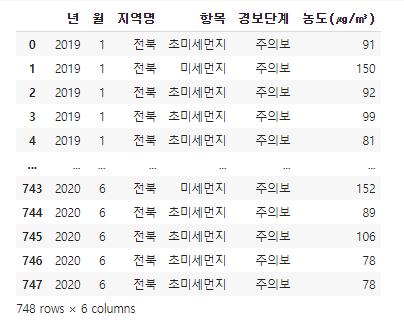

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt  # 그래프 그리는 용도
%matplotlib inline  

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,263 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144865 files and d

In [2]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
dust_data_url = '/content/gdrive/MyDrive/Colab Notebooks/data/fine_dust_data.csv'
dust_elections = pd.read_csv(dust_data_url)

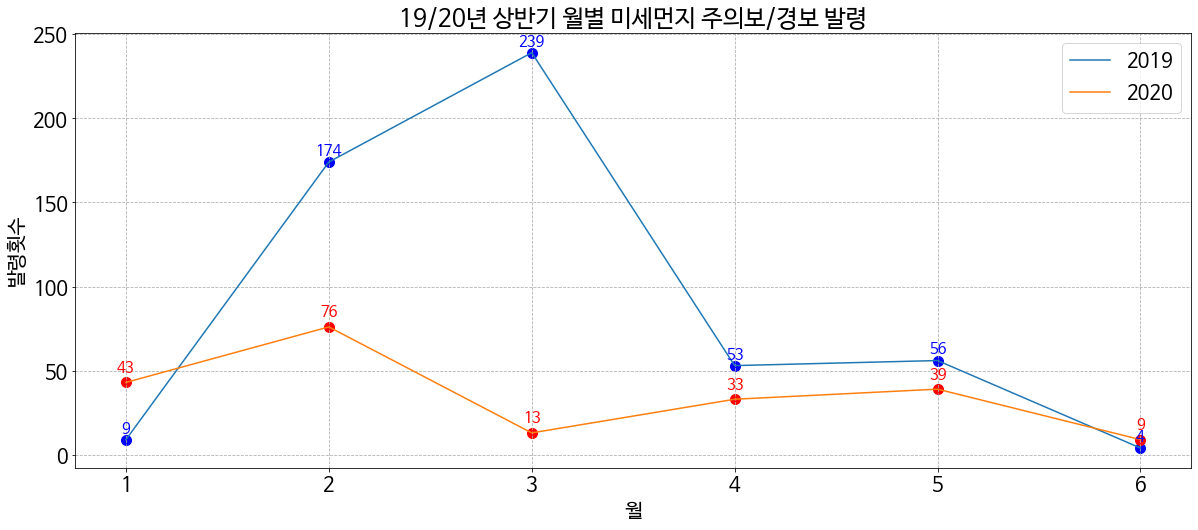

In [ ]:
mon = [1, 2, 3, 4, 5, 6]
dust_2019_mon = pd.DataFrame(dust_elections[dust_elections['년'] == 2019].groupby(['월'])['월'].count())
dust_2020_mon = pd.DataFrame(dust_elections[dust_elections['년'] == 2020].groupby(['월'])['월'].count())

# 레이아웃 크기
plt.rc('font', family='NanumBarunGothic')  
plt.title('19/20년 상반기 월별 미세먼지 주의보/경보 발령')
plt.rcParams["figure.figsize"] = (20,8) 
plt.rcParams.update({'font.size': 20})

plt.plot(dust_2019_mon.index, dust_2019_mon['월'])
plt.scatter(dust_2019_mon.index, dust_2019_mon['월'], c = 'b', s = 100)
plt.plot(dust_2020_mon.index, dust_2020_mon['월'])
plt.scatter(dust_2020_mon.index, dust_2020_mon['월'], c = 'r', s = 100)

for i, v in enumerate(dust_2019_mon['월']):
  plt.text(mon[i], v+2, v, fontSize = 15, color = 'blue', horizontalalignment = 'center', verticalalignment = 'bottom')
for i, v in enumerate(dust_2020_mon['월']):
  plt.text(mon[i], v+4, v, fontSize = 15, color = 'red', horizontalalignment = 'center', verticalalignment = 'bottom')

plt.xlabel('월')
plt.ylabel('발령횟수')
plt.legend([2019, 2020])
plt.grid(True, linestyle ='--')

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


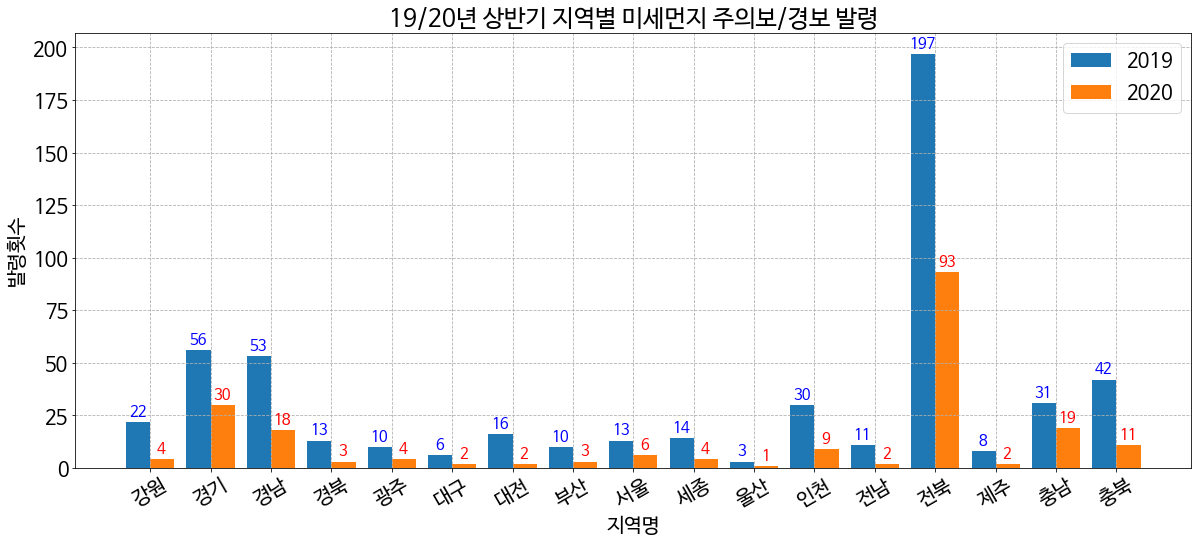

In [ ]:
dust_2019_local = pd.DataFrame(dust_elections[dust_elections['년'] == 2019].groupby(['지역명'])['지역명'].count())
dust_2020_local = pd.DataFrame(dust_elections[dust_elections['년'] == 2020].groupby(['지역명'])['지역명'].count())


plt.title('19/20년 상반기 지역별 미세먼지 주의보/경보 발령')
ax = plt.subplot()
ax.set_xticklabels(dust_2020_local.index, rotation=30)

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 17)
value_b_x = create_x(2, 0.8, 2, 17)

ax.bar(value_a_x, dust_2019_local['지역명'])
ax.bar(value_b_x, dust_2020_local['지역명'])

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticklabels(dust_2019_local.index)

for i, p in enumerate(ax.patches):
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(int(height), (left+width - 0.85/2, height+3), ha='center', fontSize = 15, color = 'blue' if i<17 else 'red')

plt.xlabel('지역명')
plt.ylabel('발령횟수')
ax.legend([2019, 2020])
ax.set_xticks(middle_x)
plt.grid(True, linestyle ='--')

plt.show()